## TASK 4 - To Explore Decision Tree Algorithm

For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

## Nikita Nagraj


Decision Tree Introduction
Decision tree algorithm falls under the category of supervised learning.

They can be used to solve both regression and classification problems.

Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

Import Libraries

In [ ]:
import numpy as np
import pandas as pd


Load the dataset

In [ ]:
iris=pd.read_excel("Iris.xlsx")

In [ ]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



Let's plot our data points, so that we can have a better understanding of our data and it's distribution

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


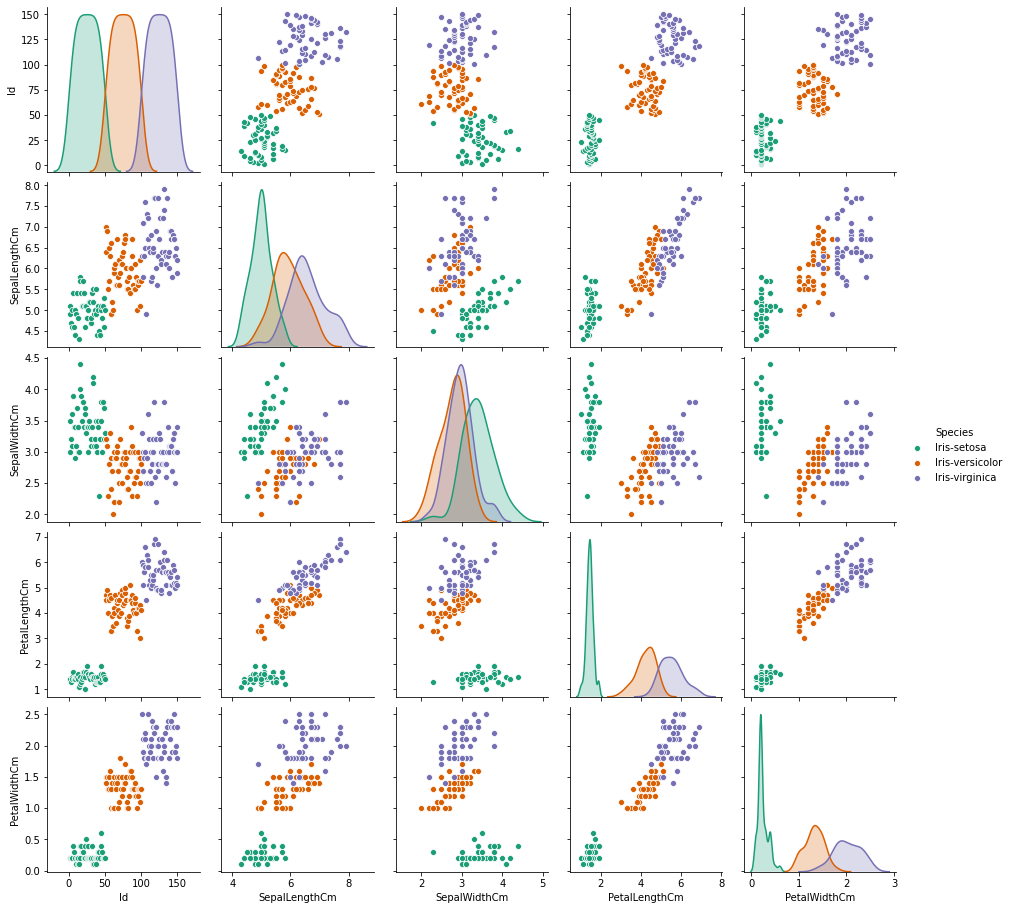

In [ ]:
sns.pairplot(iris, height=2.5, diag_kind="kde", hue='Species', palette='Dark2')

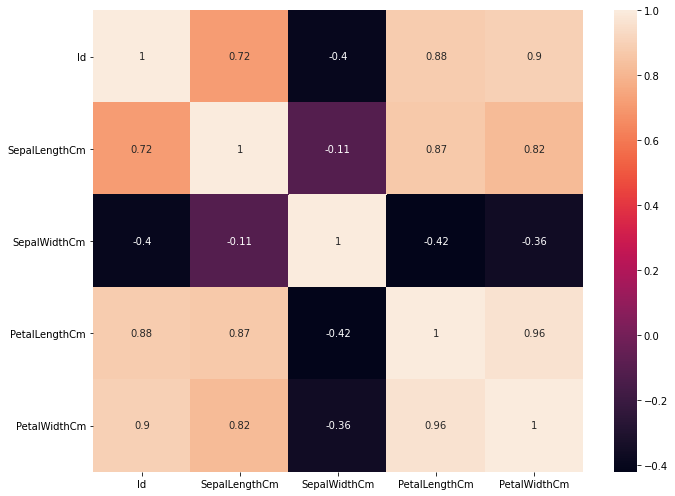

In [ ]:
# Plotting heatmap to visualise correlation among features

plt.figure(figsize=(10,7))

sns.heatmap(iris.corr(), annot = True)

plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt


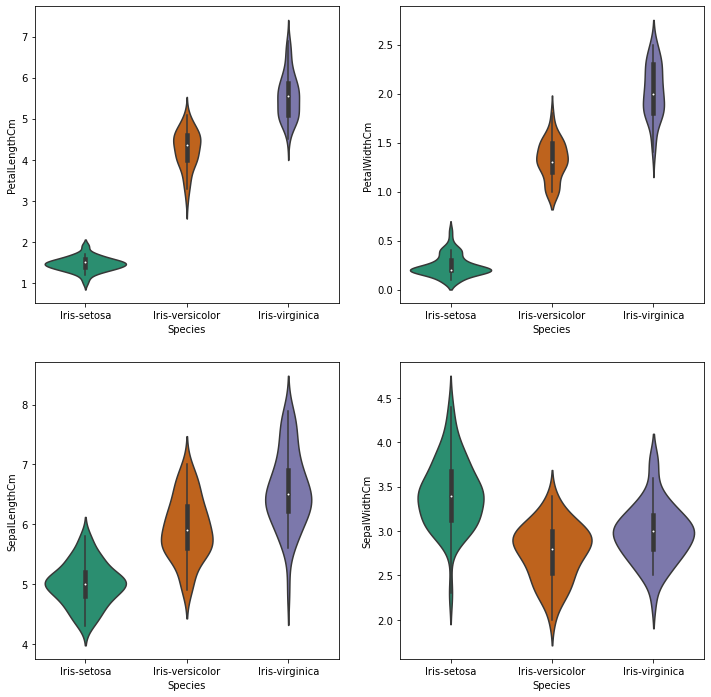

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=7, palette='Dark2')
plt.subplot(2, 2, 2)
sns.violinplot(x="Species", y="PetalWidthCm", data=iris, size=7, palette='Dark2')
plt.subplot(2, 2, 3)
sns.violinplot(x="Species", y="SepalLengthCm", data=iris, size=7, palette='Dark2')
plt.subplot(2, 2, 4)
sns.violinplot(x="Species", y="SepalWidthCm", data=iris, size=7, palette='Dark2')

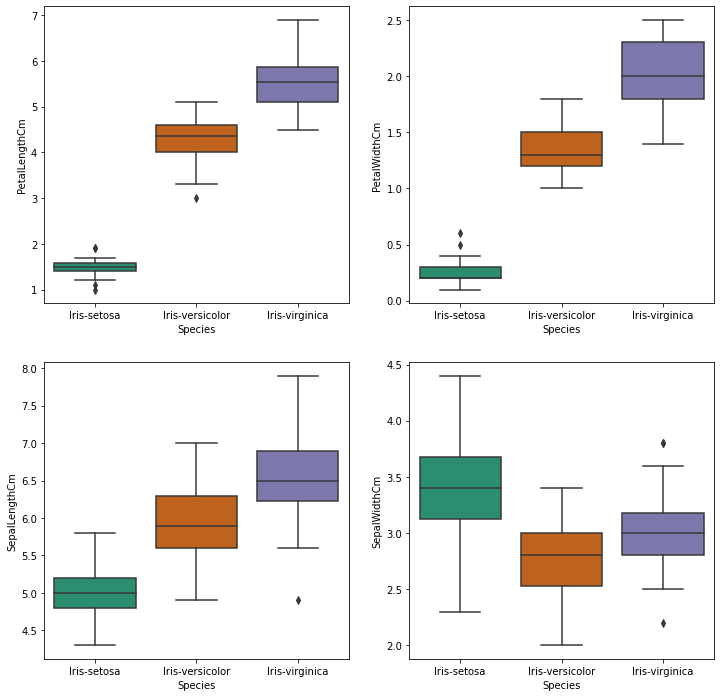

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x="Species", y="PetalLengthCm", data=iris, palette='Dark2')
plt.subplot(2, 2, 2)
sns.boxplot(x="Species", y="PetalWidthCm", data=iris, palette='Dark2')
plt.subplot(2, 2, 3)
sns.boxplot(x="Species", y="SepalLengthCm", data=iris, palette='Dark2')
plt.subplot(2, 2, 4)
sns.boxplot(x="Species", y="SepalWidthCm", data=iris, palette='Dark2')

In [ ]:
X = iris.drop('Species', axis=1)
y = iris.Species

Split the data in train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Apply Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

visualize the Decision Tree to understand it better.

In [ ]:

# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


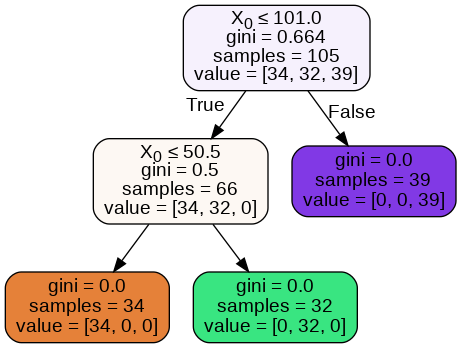

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Making predictions based on the model
Now that we have trained our algorithm, it’s time to make some predictions.

To do so, we will use our test data and see how accurately our algorithm predicts the Species.

In [ ]:
# Making Predictions

Species_pred = dt.predict(X_test) # Predicting the scores

print('Prediction completed Sucessfully.')

print('\n')

print('Predicted Species on X_test: ')
Species_pred

Prediction completed Sucessfully.


Predicted Species on X_test: 


array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)


Evaluating the model
The final step is to evaluate the performance of algorithm.

This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score

print("************************ Classification Report *************************")
print( classification_report(y_test,Species_pred))
print('\n')

print(confusion_matrix(y_test,Species_pred))
print('\n')

print(accuracy_score(y_test,Species_pred))

************************ Classification Report *************************
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



[[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]


0.9777777777777777
